# Formato ancho frente a formato largo

## Acerca de los datos
En este notebook utilizaremos datos diarios de temperatura de la API [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). Utilizaremos el conjunto de datos Global Historical Climatology Network - Daily (GHCND) para la estación Boonton 1 (GHCND:USC00280907); consulte la documentación [aquí](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf).

*Nota: El NCEI forma parte de la Administración Nacional Oceánica y Atmosférica (NOAA) y, como puede verse en la URL de la API, este recurso se creó cuando el NCEI se llamaba NCDC. Si la URL de este recurso cambiara en el futuro, puede buscar "NCEI weather API" para encontrar la actualizada.*

## Configuración

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

wide_df = pd.read_csv('data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv(
    'data/long_data.csv', 
    usecols=['date', 'datatype', 'value'], 
    parse_dates=['date']#asigna el tipo de datos fecha
)[['date', 'datatype', 'value']] # ordenar columnas (de otro modo las ordena por nombre de columna por def)

## Formato ancho
Cada una de nuestras variables tiene su propia columna:

In [2]:
wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


Describir todas las columnas es fácil:

In [4]:
wide_df.describe(include='all')

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
mean,2018-10-16 00:00:00,16.829032,7.561290,10.022581
min,2018-10-01 00:00:00,7.800000,-1.100000,-1.100000
25%,2018-10-08 12:00:00,12.750000,2.500000,5.550000
50%,2018-10-16 00:00:00,16.100000,6.700000,8.300000
75%,2018-10-23 12:00:00,21.950000,13.600000,16.100000
max,2018-10-31 00:00:00,26.700000,17.800000,21.700000
std,NaN,5.714962,6.513252,6.596550


Es fácil de graficar con `pandas` (tratadas en el capítulo 5):

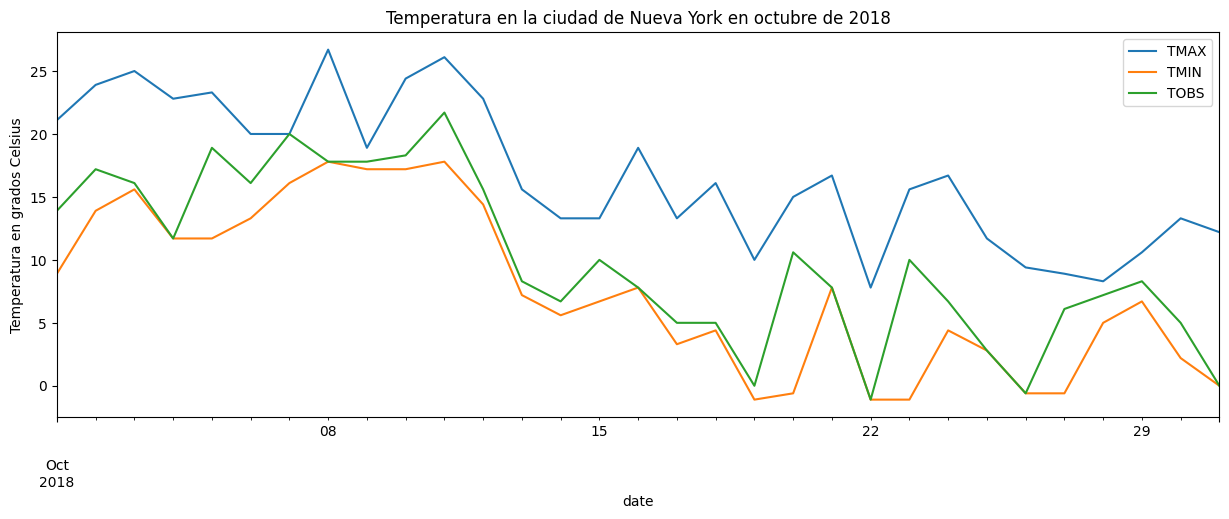

In [5]:
wide_df.plot(
    x='date', y=['TMAX', 'TMIN', 'TOBS'], figsize=(15, 5), 
    title='Temperatura en la ciudad de Nueva York en octubre de 2018'
).set_ylabel('Temperatura en grados Celsius')
plt.show()

## Formato largo
Los nombres de nuestras variables están ahora en la columna `datatype` y sus valores en la columna `value`. Ahora tenemos 3 filas para cada fecha, ya que tenemos 3 `datatypes` diferentes:

In [3]:
long_df.head(6)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
5,2018-10-02,TOBS,17.2


Dado que tenemos muchas filas para la misma fecha, utilizar `describe()` no es muy útil:

In [6]:
long_df.describe(include='all')

,date,datatype,value
count,93,93,93.000000
unique,NaN,3,NaN
top,NaN,TMAX,NaN
freq,NaN,31,NaN
mean,2018-10-16 00:00:00,NaN,11.470968
min,2018-10-01 00:00:00,NaN,-1.100000
25%,2018-10-08 00:00:00,NaN,6.700000
50%,2018-10-16 00:00:00,NaN,11.700000
75%,2018-10-24 00:00:00,NaN,17.200000
max,2018-10-31 00:00:00,NaN,26.700000


Trazar datos de formato largo en `pandas` puede ser bastante complicado. En su lugar se utiliza `seaborn` (tratado en [`ch_06/1-introduccion_a_seaborn.ipynb`](../ch_06/1-introduccion_a_seaborn.ipynb)):

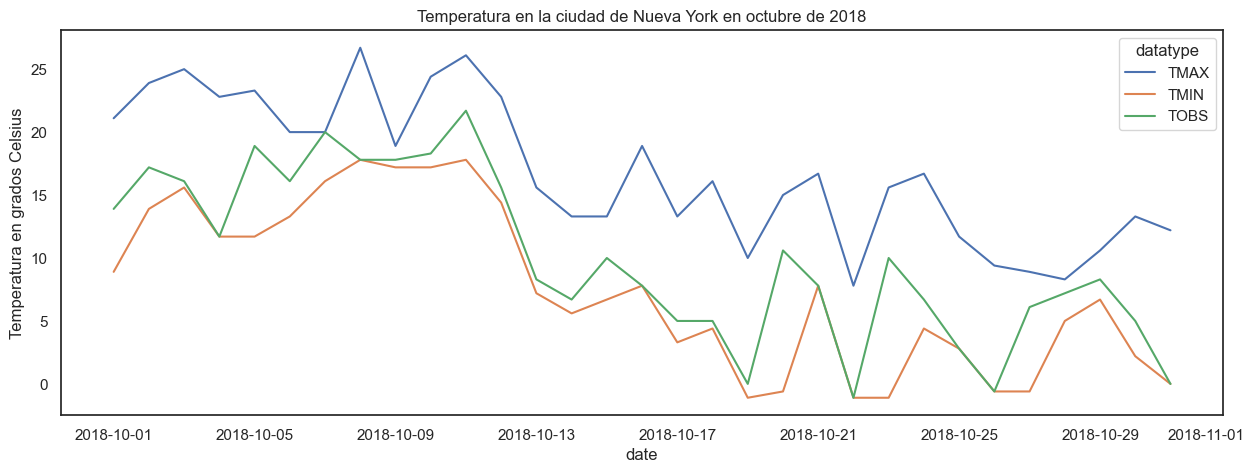

In [7]:
import seaborn as sns

sns.set(rc={'figure.figsize': (15, 5)}, style='white')

ax = sns.lineplot(
    data=long_df, x='date', y='value', hue='datatype'
)
ax.set_ylabel('Temperatura en grados Celsius')
ax.set_title('Temperatura en la ciudad de Nueva York en octubre de 2018')
plt.show()

Con datos largos y `seaborn`, podemos facetar fácilmente nuestros gráficos:

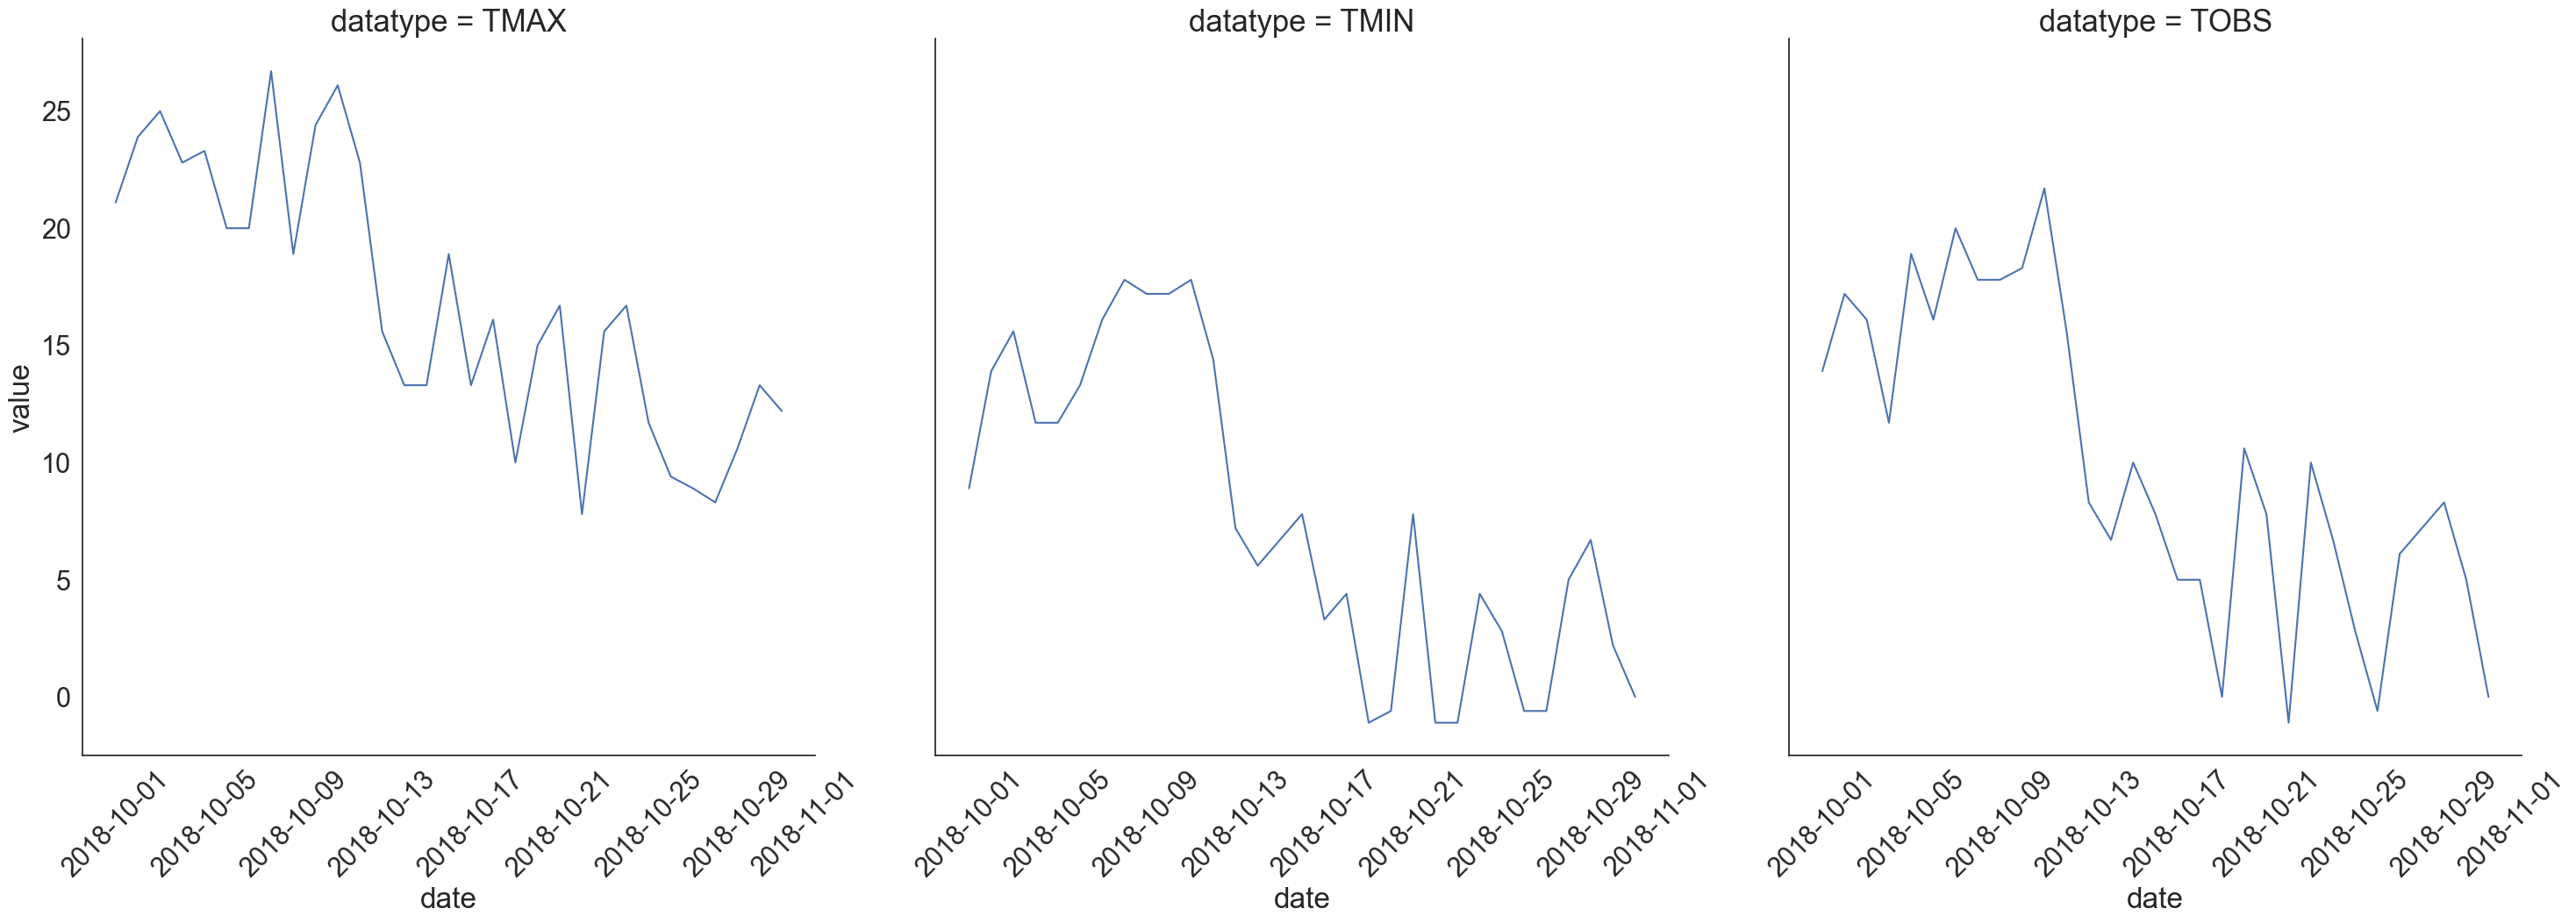

In [8]:
sns.set(
    rc={'figure.figsize': (20, 10)}, style='white', font_scale=2
)

g = sns.FacetGrid(long_df, col='datatype', height=10)
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

<hr>
<div>
    <a href="../ch_02/6-anadiendo_y_eliminando_data.ipynb">
        <button style="float: left;">&#8592; Capitulo 2</button>
    </a>
    <a href="./2-usando_la_api_weather.ipynb">
        <button style="float: right;">Sigueinte Notebook &#8594;</button>
    </a>
</div>
<br>
<hr>